In [4]:
%load_ext autoreload
%autoreload 2
import sys  
import time
sys.path.insert(0, '../')
import torch 
torch.set_printoptions(sci_mode=False)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


OSError: dlopen(/Users/flavioschneider/Documents/NextMachina/venv/lib/python3.9/site-packages/torch/lib/libtorch_global_deps.dylib, 10): no suitable image found.  Did find:
	/Users/flavioschneider/Documents/NextMachina/venv/lib/python3.9/site-packages/torch/lib/libtorch_global_deps.dylib: mach-o, but wrong architecture
	/Users/flavioschneider/Documents/NextMachina/venv/lib/python3.9/site-packages/torch/lib/libtorch_global_deps.dylib: mach-o, but wrong architecture

In [6]:
def count_model_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

In [1109]:
import time
from src.models.architectures.encoders.resnet_encoder import ResNetEncoder

# resnext101_32x8d

encoder = ResNetEncoder(name='resnet101')
print(encoder.out_channels[1:][::-1])
print(count_model_parameters(encoder))

start = time.time()
features = encoder(torch.rand(8,3,224,224))
print(time.time()-start, 's')

for feature in features:
    print(feature.shape)

[2048, 1024, 512, 256, 64]
42500160
4.159082889556885 s
torch.Size([8, 3, 224, 224])
torch.Size([8, 64, 112, 112])
torch.Size([8, 256, 56, 56])
torch.Size([8, 512, 28, 28])
torch.Size([8, 1024, 14, 14])
torch.Size([8, 2048, 7, 7])


In [1114]:
from src.models.architectures.unet import UNet 

unet = UNet(
    in_channels=3,
    out_channels=21, 
    encoder_name='resnet101',
    decoder_channels=[256, 128, 64, 32]
)

output = unet(torch.rand(1, 3, 224, 224))
print(output.shape, count_model_parameters(unet))


torch.Size([1, 21, 112, 112]) 51512181


In [748]:
from src.models.architectures.reposef2 import RePoseF2
start = time.time()
model = RePoseF2(
    in_channels=3, 
    out_channels=21, 
    encoder_name='resnet101'
)
print(count_model_parameters(model))
print(model(torch.rand(8, 3, 224, 224)).shape)
print(time.time() - start, 's')

52023167
torch.Size([8, 21, 3])
5.8426103591918945 s


In [728]:
from src.models.architectures.repose import RePose
start = time.time()
model = RePose(in_channels=3, out_channels=21, heatmap_size=56, encoder_name='resnet101', to_kp3d=True)
print(model(torch.rand(8, 3, 224, 224)).shape)
print(time.time() - start, 's')

torch.Size([8, 21, 3])
5.093678951263428 s


In [705]:
from src.models.architectures.effpose import EffPose
start = time.time()
model = EffPose(in_channels=3, out_channels=21, heatmap_size=112, to_kp3d=True)
print(model(torch.rand(8, 3, 224, 224)).shape)
print(time.time() - start, 's')

torch.Size([8, 21, 3])
6.179574012756348 s


In [749]:
from src.models.architectures.decoders.pose_decoder import PoseDecoder
model = PoseDecoder(in_channels=2048, out_channels=21, heatmap_size=56)
start = time.time()
print(model(torch.rand(8, 2048, 7, 7)).shape)
print(time.time() - start, 's')

39892287
torch.Size([8, 21, 3])
0.6694478988647461 s


In [744]:
from src.models.architectures.encoders.effnetv2_encoder import EffNetV2Encoder

model = EffNetV2Encoder(name='effnetv2_s')
start = time.time()
print(count_model_params(model))
output = model(torch.rand(8, 3, 224, 224))

for o in output:
    print(o.shape)
            
print(time.time() - start, 's')

37835880
torch.Size([8, 3, 224, 224])
torch.Size([8, 24, 112, 112])
torch.Size([8, 24, 112, 112])
torch.Size([8, 48, 56, 56])
torch.Size([8, 64, 28, 28])
torch.Size([8, 128, 14, 14])
torch.Size([8, 160, 14, 14])
torch.Size([8, 256, 7, 7])
14.584543943405151 s


In [8]:
from src.models.architectures.encoders.effnet_encoder import EfficientNetEncoder

model = EfficientNetEncoder(name='efficientnet-b4')
start = time.time()
print(count_model_parameters(model))
output = model(torch.rand(8, 3, 224, 224))

for o in output:
    print(o.shape)
            
print(time.time() - start, 's')

17548616
torch.Size([8, 3, 224, 224])
torch.Size([8, 48, 112, 112])
torch.Size([8, 32, 56, 56])
torch.Size([8, 56, 28, 28])
torch.Size([8, 160, 14, 14])
torch.Size([8, 448, 7, 7])
5.31333589553833 s


In [855]:
from src.models.architectures.decoders.pose_decoder import PoseDecoder

model = PoseDecoder(
    in_channels=2048,
    out_channels=21, 
    heatmap_size=112, 
    mid_blocks=3,
    highres_channels = 48
)

print(count_model_parameters(model))
start = time.time()
out = model(torch.rand(8, 2048, 7, 7), torch.rand(8, 48, 56, 56))
print(out[0].shape, out[1].shape)
print(time.time() - start, 's')

9409855
torch.Size([8, 21, 3]) torch.Size([8, 21, 3, 112])
1.5642290115356445 s


In [880]:
from src.models.architectures.decoders.posef3_decoder import PoseF3Decoder
    
model = PoseF3Decoder(
    in_highres_channels = 256,
    in_lowres_channels = 2048,
    out_channels = 21,
    heatmap_size = 56
)

print(count_model_parameters(model))
start = time.time()
xyz, xyz_hm = model(torch.rand(8, 2048, 7, 7), torch.rand(8, 256, 56, 56))
print(time.time() - start, 's')
print(xyz.shape, xyz_hm.shape)

2249726
2.913970947265625 s
torch.Size([8, 21, 3]) torch.Size([8, 21, 3, 56])


In [874]:
from src.models.architectures.reposef3 import RePoseF3
model = RePoseF3()

print(count_model_parameters(model))

start = time.time()
xyz = model(torch.rand(8, 3, 224, 224))
print(time.time() - start, 's')
print(xyz.shape)

start = time.time()
xyz, xyz_hm = model.forward_with_heatmaps(torch.rand(8, 3, 224, 224))
print(time.time() - start, 's')
print(xyz_hm.shape)

25757758
5.5364930629730225 s
torch.Size([8, 21, 3])
5.8641111850738525 s
torch.Size([8, 21, 3, 56])


In [876]:
from src.models.architectures.reposef4 import RePoseF4
model = RePoseF4()

print(count_model_parameters(model))

start = time.time()
xyz, xyz_hm = model.forward_with_heatmaps(torch.rand(8, 3, 224, 224))
print(time.time() - start, 's')
print(xyz_hm.shape)

44701630
14.150250911712646 s
torch.Size([8, 21, 3, 112])


In [882]:
from src.models.architectures.decoders.litepose_decoder import LitePoseDecoder
    
model = LitePoseDecoder(
    in_highres_channels = 256,
    in_lowres_channels = 2048,
    out_channels = 21
)

print(count_model_parameters(model))
start = time.time()
xyz, xyz_hm = model(torch.rand(8, 2048, 7, 7), torch.rand(8, 256, 56, 56))
print(time.time() - start, 's')
print(xyz.shape, xyz_hm.shape)

6464831
2.312770128250122 s
torch.Size([8, 21, 3]) torch.Size([8, 21, 3, 112])


In [885]:
from src.models.architectures.relitepose import ReLitePose
model = ReLitePose()

print(count_model_parameters(model))

start = time.time()
xyz, xyz_hm = model.forward_with_heatmaps(torch.rand(8, 3, 224, 224))
print(time.time() - start, 's')
print(xyz_hm.shape)

48964991
4.991587162017822 s
torch.Size([8, 21, 3, 112])


In [1]:
# Test if trained model is rotation invariant (it is not)

import torchvision
import pytorch_lightning as pl
from src.models.default_model import DefaultModel
from src.datamodules.datasets.handpose_dataset import HandposeDataset
from src.utils.plot_utils import *
from src.utils.data_utils import Scale
from torchvision.transforms import functional as F
from scipy.spatial.transform import Rotation as R

model = DefaultModel.load_from_checkpoint(checkpoint_path="../trained_models/f014_2.ckpt").model
dataset = HandposeDataset(root="../data", train=False, transforms=torchvision.transforms.ToTensor())
to_pil = torchvision.transforms.ToPILImage()
to_tensor = torchvision.transforms.ToTensor()

class Transform:
    
    @staticmethod
    def rotate(points: Tensor, degrees: float):
        radians = np.radians(-degrees)
        rotation_vector = np.array([0, 0, radians])
        rotation = R.from_rotvec(rotation_vector)
        points = rotation.apply(points)
        return torch.tensor(points)

OSError: dlopen(/Users/flavioschneider/Documents/NextMachina/venv/lib/python3.9/site-packages/torch/lib/libtorch_global_deps.dylib, 10): no suitable image found.  Did find:
	/Users/flavioschneider/Documents/NextMachina/venv/lib/python3.9/site-packages/torch/lib/libtorch_global_deps.dylib: mach-o, but wrong architecture
	/Users/flavioschneider/Documents/NextMachina/venv/lib/python3.9/site-packages/torch/lib/libtorch_global_deps.dylib: mach-o, but wrong architecture

<ipython-input-1002-bf51ab898bb8>:11: UserWarning:

To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).

<ipython-input-1002-bf51ab898bb8>:12: UserWarning:

To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).



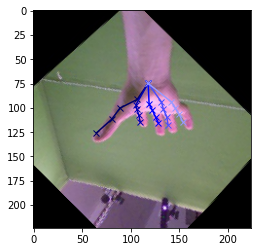

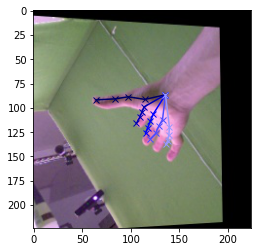

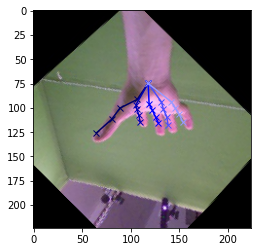

In [1002]:
degrees = 45
img, cam, *others = dataset.__getitem__(1)
img_rotated = F.rotate(img, degrees, F.InterpolationMode.NEAREST, expand=False, center=None, fill=None)

points_pred_norm = model(img.unsqueeze(0))
points_pred = Scale.linear(points_pred_norm, domain=Scale.HM(112), range=Scale.KPN)

points_rot_pred_norm = model(img_rotated.unsqueeze(0))
points_rot_pred = Scale.linear(points_rot_pred_norm, domain=Scale.HM(112), range=Scale.KPN)

plot_fingers2D(kp3d_to_kp2d(points_pred.squeeze().detach(), torch.tensor(cam).float()), to_pil(img))
plot_fingers2D(kp3d_to_kp2d(points_rot_pred.squeeze().detach(), torch.tensor(cam).float()), to_pil(img_rotated))

In [1063]:
# Test graph nets

from src.models.architectures.graphnets import GraphNet, GraphUNet

gnet = GraphNet(
    in_features = 2050, 
    out_features = 2, 
    blocks_features = [128, 16], 
    num_nodes = 21
)

print('GraphNet:', gnet(torch.rand((8, 21, 2050))).shape, count_model_params(gnet))
    
gunet = GraphUNet(
    in_features = (21, 2), # (nodes, features)
    out_features = (21, 3),
    blocks_features = [(15, 4), (7, 8), (4, 16), (2, 32), (1, 64)],
    bottleneck_size = 20 
)
    
print('GraphUNet:', gunet(torch.rand(8, 21, 2)).shape, count_model_params(gunet))

#for name, param in gunet.named_parameters():
#    if param.requires_grad:
#        print(name)

GraphNet: torch.Size([8, 21, 2]) 265949
GraphUNet: torch.Size([8, 21, 3]) 10020


In [1084]:
# Graphpose
from src.models.architectures.graphpose import GraphPose
    
gpose = GraphPose()
points2d, points3d = gpose(torch.rand((8, 3, 224, 224)))
print(points2d.shape, points3d.shape)

torch.Size([8, 21, 2]) torch.Size([8, 21, 3])


In [1113]:


x = torch.rand((8, 32, 64, 64))

print(x.flatten(start_dim=1).shape)


torch.Size([8, 131072])
